<a href="https://colab.research.google.com/github/Shreya-1504/Risk_prediction/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
uploaded=files.upload()

Saving loan_approval_dataset.json to loan_approval_dataset.json


In [5]:
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_json(io.BytesIO(uploaded[file_name]))
print(df.head())

   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

In [6]:
#Data Exploration
print("info:\n")
df.info()
print("shape:\n")
df.shape
print("\ndescribe:\n")
print(df.describe())
print("\isnull:\n")
print(df.isnull().sum())



info:

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB
shape:


describe:

                  Id        Income            Age     Experience  \
count  252000.000000  2.5200

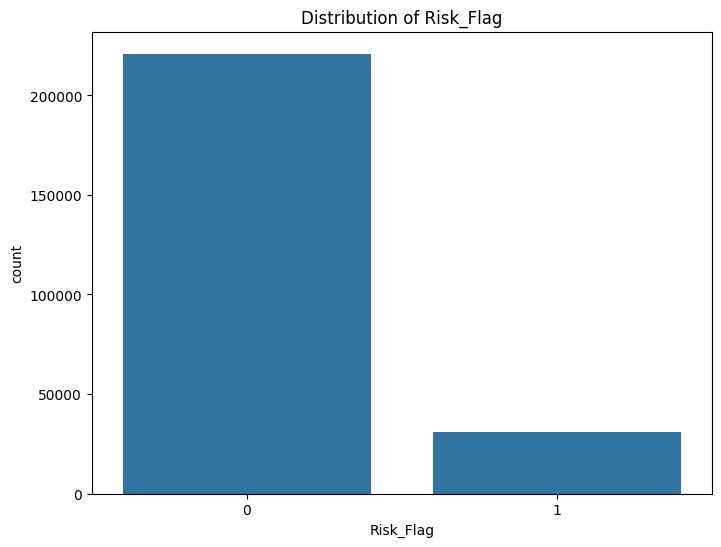

In [7]:
#Data Visualization
#countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk_Flag', data=df)
plt.title('Distribution of Risk_Flag')
plt.savefig('countplot.png')
plt.show()

In [9]:
df = pd.get_dummies(df, drop_first=True)  #convert categorical data to numerical data
X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']


In [10]:
#Standardizing and splitting the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
#Using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
# Building the ML model

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Evaluating the built model
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[42559  1588]
 [ 3367  2886]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     44147
           1       0.65      0.46      0.54      6253

    accuracy                           0.90     50400
   macro avg       0.79      0.71      0.74     50400
weighted avg       0.89      0.90      0.89     50400

Accuracy: 0.901686507936508


                       importance
Id                       0.325227
Income                   0.067700
Age                      0.058010
Experience               0.044442
CURRENT_JOB_YRS          0.041895
...                           ...
CITY_Gangtok             0.000244
CITY_Hosur               0.000235
CITY_Katni               0.000234
CITY_Gandhinagar         0.000230
CITY_Sultan_Pur_Majra    0.000209

[404 rows x 1 columns]


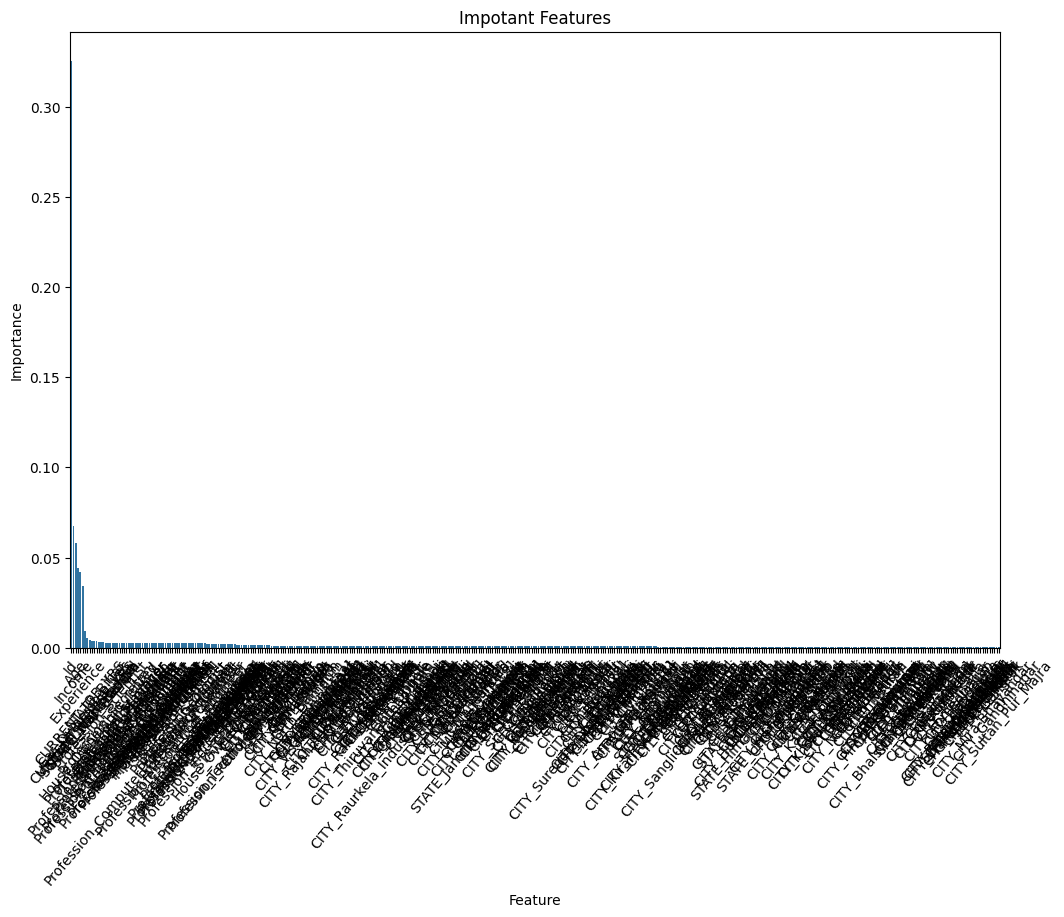

In [18]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=50)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Impotant Features')
plt.savefig('feature_importances.png')
plt.show()